<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Prova Pràctica 1 - Exploració: Grafs, DFS, BFS, Dijkstra</h2>
</center>
</div>

In [151]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<div class="alert alert-info">
<h2>Avís general per a les Pràctiques de Laboratori</h2>

És molt important <b>comentar tot el vostre codi</b>. Comentar el codi no només facilita a altres persones que el llegeixin la compressió del que esteu fent, sinó també a vosaltres mateixos durant el procés de disseny i implementació. D'aquesta forma podreu entendre el vostre propi codi encara que faci molt temps que no el consulteu. A més, a l'hora de ser corregits, un codi comentat s'entén molt millor, la qual cosa ajuda a traslladar al professor les idees que teníeu a l'intentar implementar-lo i encara més en el cas que no ho hagueu pogut acabar-ho amb èxit. No cal comentar cada línia, però si el que fa cada part.

En segon lloc, és molt important <b>respectar les capçaleres de les funcions i estructura de la funció ```return```</b> que s'indiquin a l'enunciat. Tot i que llegim i corregim els vostres codis en detall, fem servir correctors automàtics per guiar i agilitzar el procés i saber quines solucións funcionen i quines no ja d'entrada. 

Axí doncs, si es demana que la funció tingui la següent estructura: 

```python
def exercici1(param1, param2):
    # implementació de la solució
    return resultat 
```

És important que en el notebook existeixi aquesta funció i que no canvieu el nom dels paràmetres ni el tipus de dada retornada.
    
</div>




<div class="alert alert-success">
<h1>Problema: Benzineres (5p)</h1>
<p>
    Donat un cotxe amb un dipòsit de $D$ litres, volem recórrer un laberint des de $S$(tart) fins a $E$(nd). A cada pas dins del laberint es consumeix 1 litre del dipòsit, i si el dipòsit es buida, ja no podrem avançar més. A més, aquest laberint conté $B$ benzineres, que en arribar a una benzinera omplim completament el dipòsit. Implementeu un algorisme basat en les vostres implementacions de la pràctica 1 que retorni True si podem arribar a $E$ des de $S$, i False en cas contrari; a més feu que retorni els nodes visitats en una llista o set.<br>
La signatura de la funció és 

```python
def solve_maze_gas(G, B, D, start, end):
    # implementació de la solució
    return valor, nodes 
```

    
La funció <b>solve_maze_gas(G, B, D, start, end)</b> té com entrada:
<ul>
    <li><b>G</b> el graf no dirigit del laberint.</li>
    <li><b>B</b> un diccionari on les claus són els nodes que són benzineres i el valor és un boolean True si ha estat feta servir, i un False en cas contrari.</li>
    <li><b>D</b> la capacitat del dipòsit.</li>
    <li><b>start</b> el node d'inici del recorregut.</li>
    <li><b>end</b> el node de destí al qual volem arribar.</li>
</ul>
i com a sortida: 
<ul>
    <li><b>valor</b> pren valors <i>True</i> o <i>False</i>.</li>
    <li><b>nodes</b> llista o set dels nodes visitats.</li>
</ul>


Recordeu que és necessari <b>no canviar l'estructura de la funció</b>. No canvieu ni el nom de la funció, ni el nom dels paràmetres d'entrada ni els de sortida. Podeu fer servir funcions auxiliars.<br>
</p>    
    
</div>

In [152]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *
from random import randint

In [153]:
def create_maze(n, m, B, seed=None):
    """
    Funció per crear laberints de n x m amb B nombre de benzineres aleatories. Retorna el objecte Maze
    i la llista de benzineres
    """
    maze = Maze(n, m, seed=seed, p_build=0.1)
    # podeu modificar on es posen les benzineres, ara mateix es posen a llocs aleatoris
    gas_stations = [randint(1, n*m - 2) for _ in range(B)]
    colorS, colorE, colorB = (0, 255, 0), (0, 0, 255), (255, 0, 0)
    
    maze.set_values([0], 1, colorS) # Node d'inici
    maze.set_values([n*m - 1], 1, colorE) # Node de destí
    maze.set_values(gas_stations, 1, colorB) # Benzineres
    
    return maze, gas_stations

In [154]:
import heapq
# Funció que heu de implementar
def solve_maze_gas(G, B, D, start, end):
    visited = [] # Set de nodes visitats
    val = True # Valor de retorn que defineix si el problema té solució o no
    
    
    # El vostre codi
    visitedActual = []
    visitedAux = []
    cost = 0
    benzineresVisited = []
    #Fem un diccionari que guarda (nodeActual: nodeAnterior)
    diccionariPath = {}

    #Creem el heap
    h = [(0, start)] 
    heapq.heapify(h)
    val = False
    #Iterem el heap com a priority queue igual que amb el BFS amb la queue, fins trobar node destination
    while h:
        costActual, node = heapq.heappop(h) #Agafem el primer node de la priority queue
        #Mirem si el node 
        if node not in visitedActual:
            visitedActual.append(node)
            if node == end: #break per sortir
                visitedAux += visitedActual
                val = True
                break
            if node in B and node not in benzineresVisited: #Mirem si hem passat per la benzinera
                costActual = 0 
                benzineresVisited.append(node)
                #Fem reset de visited actual , per tal de que es puguin repetir nodes, despres de passar per una benzinera
                visitedAux += visitedActual
                visitedActual = []
            for vei in G.neighbors(node): #Iterem pels veins del node
                if vei not in visitedActual:
                    if costActual < D: #Si el cost és menor que la distància màxima
                        heapq.heappush(h, (costActual+1, vei)) #fiquem el vei al priority queue
    visitedAux += visitedActual
    for n in visitedAux:
        if n not in visited:
            visited.append(n)
    #visited = visited[1:len(visited)]
    
    return val, visited

<div class="alert alert-warning">
<h1>Codi addicional per fer proves</h1>
</div>

A continuació teniu un codi per fer proves de la crida al vostre codi.

Té solució.


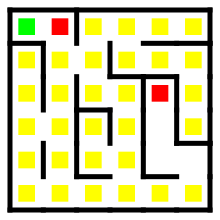

In [155]:
maze, stations = create_maze(6, 6, 2) # Creem un maze 6x6 amb 2 benzineres aleatories

diposit = 10   # Dipòsit de 10 litres
inici = 0      # Inici es el primer node (top-left)
final = 6*6-1  # Destí es l'últim node (bottom-right)

# la vostra funció
val, visited = solve_maze_gas(maze.maze_graph(), stations, diposit, inici, final)

if val: print("Té solució.")
else: print("No té solució")

if 0 in visited:
    visited.remove(0)

for s in stations:
    if s in visited:
        visited.remove(s)
maze.set_values(visited, 1, (255,255,0))
maze.display_maze(plot_path=True, height=200)

<div class="alert alert-warning">
<h1>Entrega de la Prova</h1>
</div>

A continuació trobareu un codi que fa d'envolcall (<i>wrapper</i>) de la vostra funció i que permetrà utilitzar l'ub_grader.

In [156]:
def wrapper_gas_problem(n, m, seed, B, D, p_build):
    maze = Maze(n, m, seed=seed, p_build=p_build)
    val, _ = solve_maze_gas(maze.maze_graph(), B, D, 0, n*m - 1)
    return val

<div class="alert alert-info">
L'entrega de la prova de pràctica es farà amb el mòdul de <b>ub-grader</b>. Per instal·lar-lo feu servir la següent comanda a terminal:

```
python pip install ub-grader --upgrade
```

O una cel·la del notebook amb:

```
!pip install ub-grader --upgrade
```
<br>

Després, a la cel·la següent canvieu els niubs i noms pels vostres. Executeu-la per generar el vostre report del problema. Finalment, el report es generarà al directori d'aquest notebook amb nom ```report_Membre1_Membre2_ex3.enc```, pugeu aquest fitxer al campus virtual una vegada acabada la prova.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>

</div>

In [157]:
from ub_grader import init_students, load_spec, grade

init_students([
    {"niub": "20922145", "nombre": "Biel", "apellidos": "Palomar Gonzalez"}, # Canvieu aquests noms i niubs
    {"niub": "20127225", "nombre": "Oriol", "apellidos": "Jiménez Blanco"}
])


load_spec(r"file:///./specs/benzineres_mati.json")

result = grade(
    wrapper_gas_problem,
    signing_key_path=None
)

Grade: 10.0 / 10.0
